In [ ]:
from keras.applications import vgg16

In [ ]:
img_rows , img_cols = 224,224

In [ ]:
vgg = vgg16.VGG16(weights = 'imagenet' , include_top = False , input_shape= (img_rows , img_cols , 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
for (i,layer) in enumerate(vgg.layers):
  print(str(i) + " " + layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def lw(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dense(num_classes, activation='softmax')(top_model)

  return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

In [ ]:
num_classes = 2
FC_head = lw(vgg , num_classes)
model = Model(inputs= vgg.input, outputs = FC_head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# mount google drive

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data = '/content/drive/MyDrive/Photos/photos/train'
validaation_data = '/content/drive/MyDrive/Photos/photos/validate'

In [ ]:
train_data_gen = ImageDataGenerator( rescale = 1./255 ,
                                    rotation_range=45 ,
                                     width_shift_range=0.3 ,
                                     horizontal_flip=True ,
                                     fill_mode='nearest' )

In [ ]:
validation_data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [ ]:
train_generator = train_data_gen.flow_from_directory(
        train_data,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 539 images belonging to 2 classes.


In [ ]:
validation_generator = validation_data_gen.flow_from_directory(
        validaation_data,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 303 images belonging to 2 classes.


In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("face recognisation.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
from keras import callbacks
callbacks = [earlystop , checkpoint]

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 108
nb_validation_samples = 52

epochs = 5
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-26-9997e1935019>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 1.7871 - accuracy: 0.4896 
Epoch 1: val_loss improved from inf to 0.73443, saving model to face recognisation.h5
6/6 [==============================] - 226s 38s/step - loss: 1.7871 - accuracy: 0.4896 - val_loss: 0.7344 - val_accuracy: 0.4583
Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5312 
Epoch 2: val_loss improved from 0.73443 to 0.70453, saving model to face recognisation.h5
6/6 [==============================] - 199s 35s/step - loss: 0.6856 - accuracy: 0.5312 - val_loss: 0.7045 - val_accuracy: 0.4896
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.5187 
Epoch 3: val_loss improved from 0.70453 to 0.65532, saving model to face recognisation.h5
6/6 [==============================] - 195s 35s/step - loss: 0.7014 - accuracy: 0.5187 - val_loss: 0.6553 - val_accuracy: 0.6042
Epoch 4/5
6/6 [==============================] - ETA: 0s - loss: 0.6600

In [ ]:
from keras.models import load_model
classifier = load_model('/content/face recognisation.h5')

import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile , join



Class - aamir 


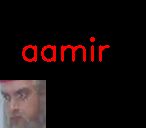

Class -  salman


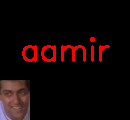

Class - aamir 


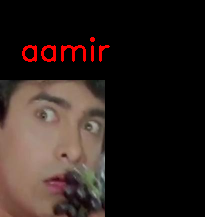

Class - aamir 


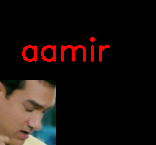

Class - aamir 


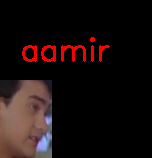

Class -  salman


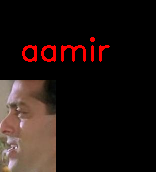

Class -  salman


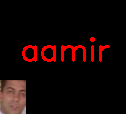

Class - aamir 


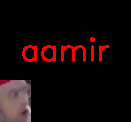

Class -  salman


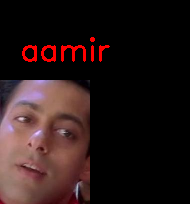

Class -  salman


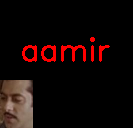

In [ ]:
monkey_breeds_dict = {"[0]": " salman ",
                      "[1]": "aamir "}

monkey_breeds_dict_n = {"n0": " salman",
                      "n1": "aamir "}

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)

for i in range(0,10):
    input_im = getRandomImage('/content/drive/MyDrive/Photos/photos/validate/')
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3)

    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)

    # Show image with predicted class
    draw_test("Prediction", res, input_original)
    cv2.waitKey(0)

cv2.destroyAllWindows()